In [98]:
import pandas as pd 
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# CLIENTS

In [99]:
# Load data
df_clients = pd.read_csv('data/clients.csv', sep=';')
df_clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


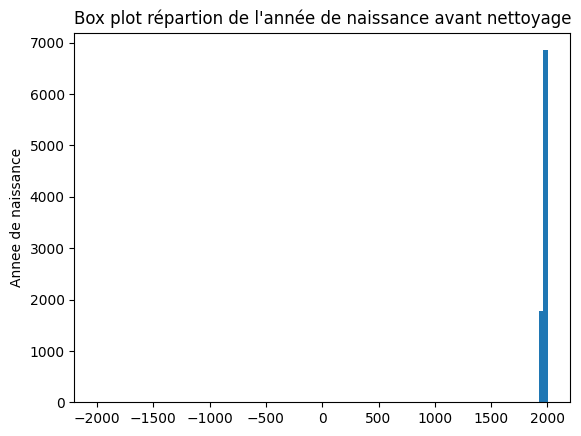

In [100]:
# Histogramme de la répartition des ages
plt.hist(df_clients['birth'], bins=100)


plt.title("Box plot répartion de l'année de naissance avant nettoyage")
plt.ylabel("Annee de naissance")

plt.show()

In [101]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [102]:
df_clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [103]:
for col in df_clients.columns:
    print(f'{col}: {df_clients[col].unique()}')

client_id: ['c_4410' 'c_7839' 'c_1699' ... 'c_5119' 'c_5643' 'c_84']
sex: ['f' 'm']
birth: [ 1967  1975  1984  1962  1943  1993  1978  1971  1982  1945  2003  1959
  1977  1954  1987  2000  1992  1963  1958  1994  1936  1986  1942  1970
  1957  1968  2002  2004  1979  1974  1964  1951  1937  1981  1965  1960
  1996  1983  1990  1955  1988  1991  1972  1980  1989  1976  1985  1953
  1998  1956  1948  1973  1969  1938  1995  1952  1949  1999  2001  1939
  1950  1966  1935  1941  1961  1997  1944  1929  1947  1946  1932  1931
  1933  1930  1940  1934 -2001]


In [104]:
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_clients[['birth']])

df_clients['anomaly_if'] = clf.predict(df_clients[['birth']])

print("Les anomalies :")

print(df_clients[df_clients['anomaly_if'] == -1])

Les anomalies :
     client_id sex  birth  anomaly_if
8494      ct_1   m  -2001          -1


In [105]:
# Supprimer la ligne où la date de naissance est -2001
df_clients = df_clients[df_clients['anomaly_if'] != -1]

In [106]:
for col in df_clients.columns:
    print(f'{col}: {df_clients[col].unique()}')

client_id: ['c_4410' 'c_7839' 'c_1699' ... 'c_5119' 'c_5643' 'c_84']
sex: ['f' 'm']
birth: [1967 1975 1984 1962 1943 1993 1978 1971 1982 1945 2003 1959 1977 1954
 1987 2000 1992 1963 1958 1994 1936 1986 1942 1970 1957 1968 2002 2004
 1979 1974 1964 1951 1937 1981 1965 1960 1996 1983 1990 1955 1988 1991
 1972 1980 1989 1976 1985 1953 1998 1956 1948 1973 1969 1938 1995 1952
 1949 1999 2001 1939 1950 1966 1935 1941 1961 1997 1944 1929 1947 1946
 1932 1931 1933 1930 1940 1934]
anomaly_if: [1]


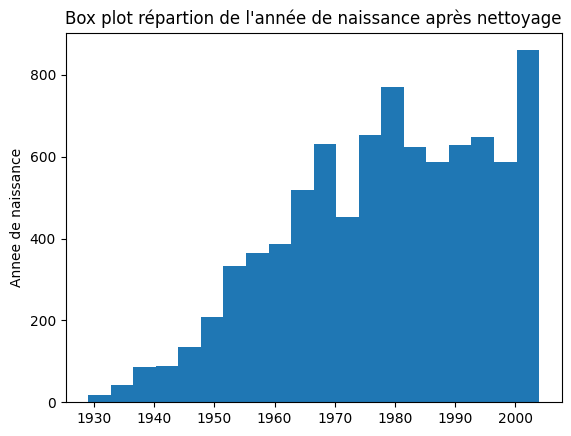

In [107]:
# Histogramme de la répartition des ages
plt.hist(df_clients['birth'], bins=20)


plt.title("Box plot répartion de l'année de naissance après nettoyage")
plt.ylabel("Annee de naissance")

plt.show()

# VENTES

In [108]:
df_produits = pd.read_csv('data/produits_sous-categorie.csv', sep=',')
df_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB


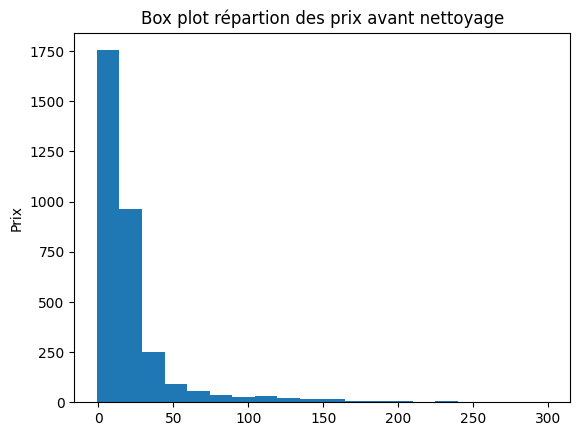

In [109]:
# Histogramme de la répartition des ages
plt.hist(df_produits['price'], bins=20)


plt.title("Box plot répartion des prix avant nettoyage")
plt.ylabel("Prix")

plt.show()

In [110]:
df_produits.isnull().sum()

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

In [111]:
for col in df_produits.columns:
    print(f'{col}: {df_produits[col].unique()}')

product_id: ['0_1421' '0_1368' '0_731' ... '0_802' '1_140' '0_1920']
category: ['Vêtements' 'Accessoires' 'Montres']
sub_category: ['T-shirts' 'Sacs à main' 'Montres connectées']
price: [19.99  5.13 17.99 ... 11.22 38.56 25.16]
stock_quantity: [39 76  2 55 81 99 65 17  1  4 36 62 88 13 48 56 67 84 49 54 32 23 58 53
 21 18 27 92 91 51 42 85 57 45 60  5 15 63 82 34 87 29 73 89 25  3 12 90
 75 28 72 26 31 74 94 71 98 40 93 16  9 96 24 95 22 11 79 97 86  6  8 70
  7 37 47 46 83 80 43 69 33 52 10 30 20 78 19 77 61 68 59 41 50 35 66 44
 14 64 38]


In [112]:
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produits[['price']])

df_produits['anomaly_if'] = clf.predict(df_produits[['price']])

print("Les anomalies :")

print(df_produits[df_produits['anomaly_if'] == -1])

Les anomalies :
     product_id category        sub_category   price  stock_quantity  \
394       2_158  Montres  Montres connectées  247.22              68   
724        2_76  Montres  Montres connectées  254.44              25   
947         2_2  Montres  Montres connectées  300.00              79   
1436      2_167  Montres  Montres connectées  236.99              32   

      anomaly_if  
394           -1  
724           -1  
947           -1  
1436          -1  


In [113]:
# Supprimer la ligne où la date de naissance est -2001
df_produits = df_produits[df_produits['anomaly_if'] != -1]

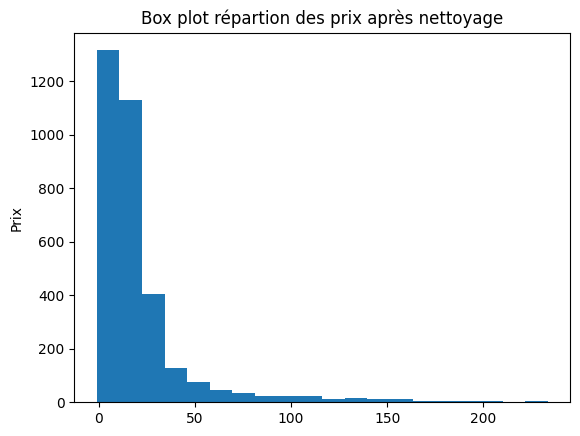

In [114]:
# Histogramme de la répartition des ages
plt.hist(df_produits['price'], bins=20)


plt.title("Box plot répartion des prix après nettoyage")
plt.ylabel("Prix")

plt.show()

In [115]:
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(df_produits[['stock_quantity']])

df_produits['anomaly_if1'] = clf.predict(df_produits[['stock_quantity']])

print("Les anomalies :")

print(df_produits[df_produits['anomaly_if1'] == -1])

Les anomalies :
Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity, anomaly_if, anomaly_if1]
Index: []


# Ventes 

In [116]:
df_ventes = pd.read_csv('data/ventes.csv', sep=',')
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


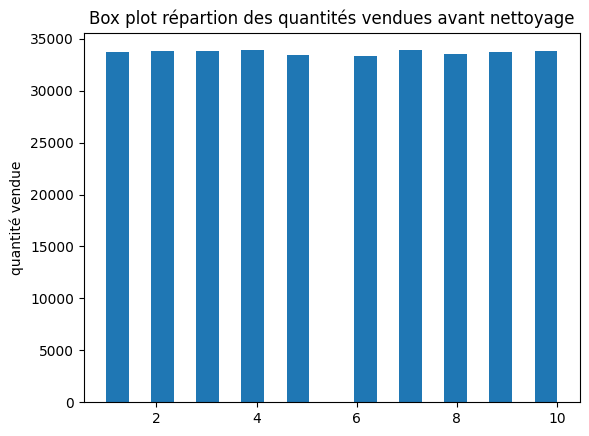

In [118]:
# Histogramme de la répartition des ages
plt.hist(df_ventes['quantity_sold'], bins=20)


plt.title("Box plot répartion des quantités vendues avant nettoyage")
plt.ylabel("quantité vendue")

plt.show()

In [119]:
df_ventes.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64

In [120]:
for col in df_ventes.columns:
    print(f'{col}: {df_ventes[col].unique()}')

id_prod: ['0_1483' '2_226' '1_374' ... '0_833' '0_1284' '0_1116']
date: ['2021-04-10 18:37:28.723910' '2022-02-03 01:55:53.276402'
 '2021-09-23 15:13:46.938559' ... '2021-03-16 17:31:59.442007'
 '2021-10-30 16:50:15.997750' '2021-06-26 14:38:19.732946']
session_id: ['s_18746' 's_159142' 's_94290' ... 's_40720' 's_7219' 's_112349']
client_id: ['c_4450' 'c_277' 'c_4270' ... 'c_5139' 'c_4679' 'c_8005']
quantity_sold: [ 5  6  3  8  2  7  4  1 10  9]


In [122]:
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(df_ventes[['quantity_sold']])

df_ventes['anomaly_if'] = clf.predict(df_ventes[['quantity_sold']])

print("Les anomalies :")

print(df_ventes[df_ventes['anomaly_if'] == -1])

Les anomalies :
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold, anomaly_if]
Index: []
